# Set up environment

In [ ]:
!pip install opencv-python ultralytics

# Convert model to onnx format

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("yolo12s.pt")

# Export the model to ONNX format
model.export(format="onnx")

# Testing Base model

In [1]:
from ultralytics import YOLO
import cv2

def predict_and_detect(chosen_model, img, class_name='person', conf=0.5, rectangle_thickness=2, text_thickness=1):
    # Get the class index for 'person'
    class_index = list(chosen_model.names.values()).index(class_name)

    # Perform prediction
    results = chosen_model.predict(img, classes=[class_index], conf=conf)

    # Draw bounding boxes and labels on the image
    for result in results:
        for box in result.boxes:
            if int(box.cls[0]) == class_index:
                cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                              (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
                cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                            (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                            cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    return img, results

In [2]:
model = YOLO("yolo12s.onnx")

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [ ]:
!pip install onnxruntime-gpu

In [3]:
# read the image
image = cv2.imread("test_image.jpg")
result_img, _ = predict_and_detect(model, image, class_name='person', conf=0.3)

Loading yolo12s.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider



2025-03-19 07:47:57.027218831 [W:onnxruntime:, transformer_memcpy.cc:83 ApplyImpl] 4 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.


0: 640x640 5 persons, 19.4ms
Speed: 28.1ms preprocess, 19.4ms inference, 220.6ms postprocess per image at shape (1, 3, 640, 640)


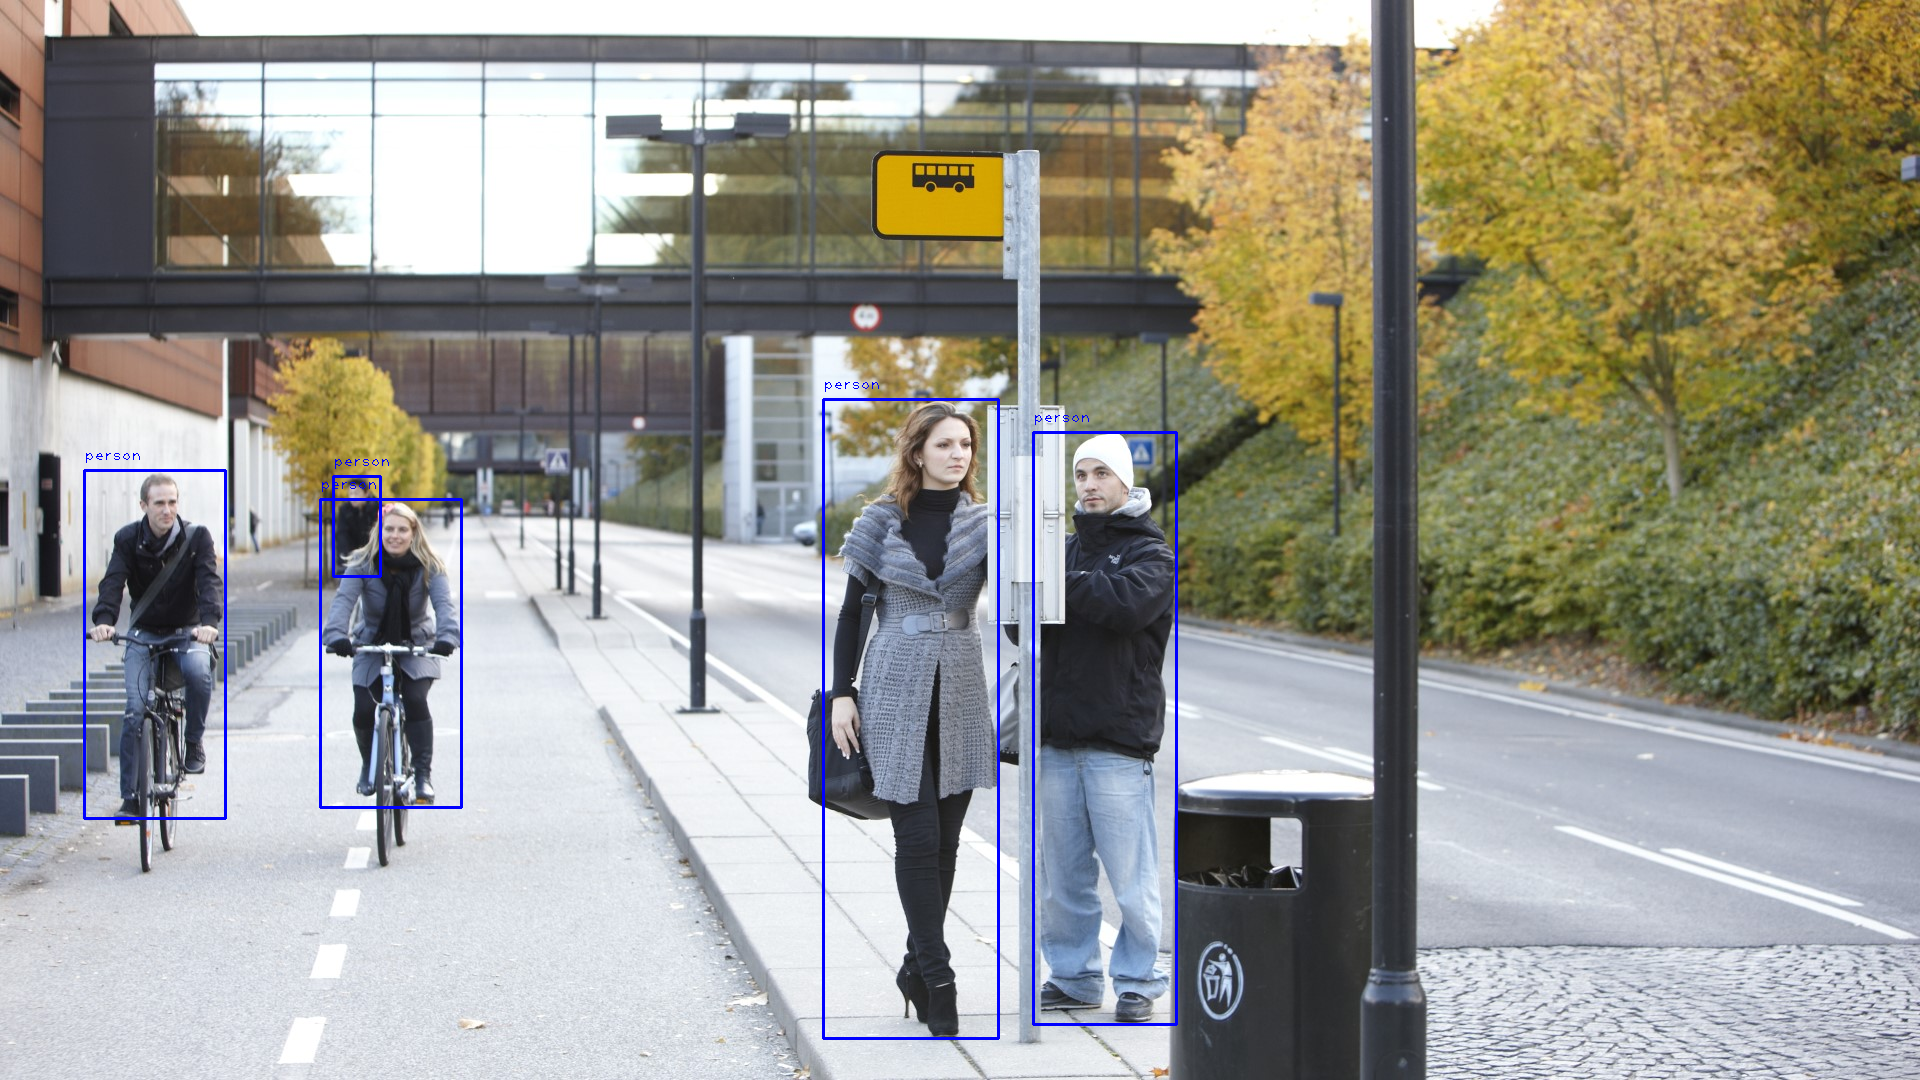

True

In [4]:
from PIL import Image
from IPython.display import display
import cv2

# Display the image
image_pil = Image.fromarray(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
display(image_pil)

# Save the image
cv2.imwrite("result.png", result_img)

In [5]:
import torch

print("Is CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("GPU Count:", torch.cuda.device_count())
    print("CUDA Version:", torch.version.cuda)
    print("PyTorch Version:", torch.__version__)


Is CUDA available: True
GPU Name: NVIDIA GeForce RTX 3060 Laptop GPU
GPU Count: 1
CUDA Version: 12.4
PyTorch Version: 2.6.0+cu124


In [6]:
import onnxruntime as ort

print("Available Execution Providers:", ort.get_available_providers())

Available Execution Providers: ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
